20. Write a function called ‘perform_hypothesis_test’ that takes two lists of numbers as input, representing two samples. The function should perform a two-sample t-test and return the p-value. Use the ‘scipy.stats’ module in Python to calculate the t-test and p-value.  

Example:  

from scipy import stats  

def perform_hypothesis_test(sample1, sample2):  
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)  
    return p_value  

sample1 = [5, 10, 15, 20, 25]  
sample2 = [10, 20, 30, 40, 50]  
p_value = perform_hypothesis_test(sample1, sample2)  
print("P-value:", p_value)  

Output:  
P-value: 0.1064706396450037  

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
i_df = pd.DataFrame(iris.data)

In [5]:

i_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

In [6]:
i_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
i_df['class']=iris.target

In [8]:
i_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
i_df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

<AxesSubplot:xlabel='sepal_len', ylabel='Count'>

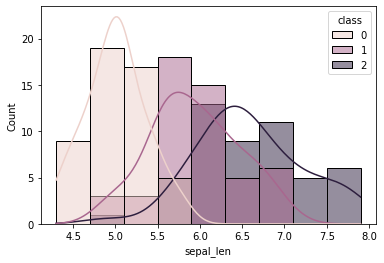

In [10]:
sns.histplot(data = i_df, x = 'sepal_len', hue = 'class', kde = True)

<AxesSubplot:xlabel='sepal_wid', ylabel='Count'>

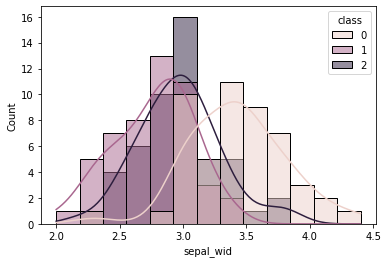

In [11]:
sns.histplot(data = i_df, x = 'sepal_wid', hue = 'class', kde = True)

<AxesSubplot:xlabel='petal_len', ylabel='Count'>

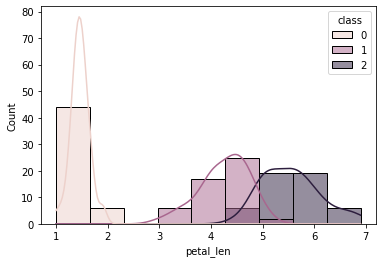

In [12]:
sns.histplot(data = i_df, x = 'petal_len', hue = 'class', kde = True)

###  Let us try to understand if the mean of sepal width of class 1  and class 2 are same or not.  


#### To apply two sample t-test: 
- The data should be independent
- They should have a normal distribution
- Samples should have equal variances. 

    We will check these criteria one by one. 

In [13]:
i_2 = list(i_df[i_df['class'] == 2]['sepal_wid'])

In [14]:
i_1 = list(i_df[i_df['class'] == 1]['sepal_wid'])

In [15]:
df_i = pd.DataFrame({'cat1' : i_1, 'cat2' : i_2})

<AxesSubplot:xlabel='cat1', ylabel='Count'>

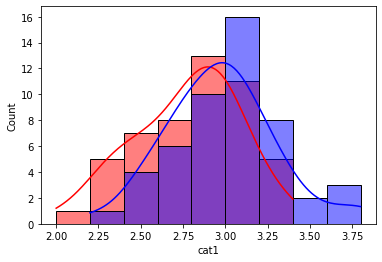

In [16]:
sns.histplot(df_i['cat1'], kde = True, alpha = 0.5, color = 'red')
sns.histplot(df_i['cat2'], kde = True, alpha = 0.5, color = 'blue')

In [17]:
df_i.describe()

,cat1,cat2
count,50.000000,50.000000
mean,2.770000,2.974000
std,0.313798,0.322497
min,2.000000,2.200000
25%,2.525000,2.800000
50%,2.800000,3.000000
75%,3.000000,3.175000
max,3.400000,3.800000


In [18]:
# testing normality of data 
r1_stat, r1_p = stats.shapiro(df_i['cat1'])
r2_stat, r2_p = stats.shapiro(df_i['cat2'])
print(f'printing statistics for cat 1 :{r1_stat, r1_p}')
print(f'printing statistics for cat 2 :{r2_stat, r2_p}')

printing statistics for cat 1 :(0.9741329550743103, 0.3379843533039093)
printing statistics for cat 2 :(0.9673907160758972, 0.18089871108531952)


In [19]:
# test for equal variance. - Levene test
stats.levene(df_i['cat1'], df_i['cat2'])

LeveneResult(statistic=0.08726625111308971, pvalue=0.7683067284841041)

### Observations from normality and tests for variance.

- We can see that the p value is greater than 0.05. Hence we will accept the null hypothesis that the data is normally distributed.

- The data belong to two different categories of flowers. Hence the data is independent
- Test for the variance. In this case we have performed levene test. As the p value is greater than 0.05. We can conclude that these data comes from the population of equal variances. 

    Now we are ready to perform the two sample t-test. 

In [20]:
# two sample t-test
stats.ttest_ind(df_i['cat1'], df_i['cat2'])

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

'p value' of T-test is less than 0.05. Hence we will reject the null hypothesis and conclude that the mean of the sample data are not the same.